In [ ]:
from tqdm import tqdm

import re

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
query_variations =pd.read_csv('/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/data/variations_antique_labeled.csv')
query_variations["query"] = query_variations.apply(lambda r, re=re: re.sub('[\W_]', ' ',  r['original_query'].lower()), axis=1)
query_variations["variation"] = query_variations.apply(lambda r, re=re: re.sub('[\W_]', ' ',  r['variation'].lower()), axis=1)
query_variations["variation"] = query_variations.apply(lambda r: r['query'] if r['variation'].strip() == "" else r['variation'], axis=1)
query_variations['qid'] =query_variations['q_id'].astype(str)
query_variations.tail(5)

,dataset,q_id,method,transformation_type,original_query,variation,valid,follow_category,query,qid
1996,antique,643630,ramsrigouthamg/t5_paraphraser,paraphrase,how do you keep your parents from divorcing,how do i keep my parents from divorcing,True,True,how do you keep your parents from divorcing,643630
1997,antique,66151,ramsrigouthamg/t5_paraphraser,paraphrase,why does the it seem the u s has more serial ...,why does the us have more serial killers than ...,True,True,why does the it seem the u s has more serial ...,66151
1998,antique,684633,ramsrigouthamg/t5_paraphraser,paraphrase,what s the best asian and why,what s the best asian food,False,False,what s the best asian and why,684633
1999,antique,752633,ramsrigouthamg/t5_paraphraser,paraphrase,how did you do when there was a bomb while...,what did you do when a bomb hit you while you ...,False,False,how did you do when there was a bomb while...,752633
2000,antique,763189,ramsrigouthamg/t5_paraphraser,paraphrase,why was wearing the colour green considered a...,why is wearing the colour green considered a s...,True,True,why was wearing the colour green considered a...,763189


# dataset

In [ ]:
def save_pickle(path,some_obj):
  with open(path, 'wb') as f:
    pickle.dump(some_obj, f)


def open_pickle(path):
  with open(path, 'rb') as handle:
      b = pickle.load(handle)
  return b 

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="darkgrid")

def return_boxplot(model_name,df):

  mispelling =['QueriesFromWordSwapNeighboringCharacterSwap',
        'QueriesFromWordSwapQWERTY',
        'QueriesFromWordSwapRandomCharacterSubstitution'
        ]

  ordering = ['QueriesFromWordInnerSwapRandom']

  naturality = ['QueriesFromnaturality_by_removing_stop_words',
                'QueriesFromsummarization_with_t5-base_from_description_to_title'
                ]
  paraphrasing = ['QueriesFromback_translation_pivot_language_de',
                  'QueriesFromramsrigouthamg/t5_paraphraser',
                  'QueriesFromWordSwapEmbedding',
                  'QueriesFromWordSwapWordNet'
                  ]
  df['ndcg_cut.10'] = df.iloc[0,1]-df['ndcg_cut.10']
  df = df.replace([model_name +l for l in mispelling],'Mispelling')
  df =df.replace([model_name +l for l in naturality],'Naturality')
  df =df.replace([model_name +l for l in ordering],'Ordering')
  df =df.replace([model_name +l for l in paraphrasing],'Paraphrasing')
  df = df[["name","ndcg_cut.10"]]
  df = df.drop(0)

  ax = sns.boxplot(x="name", y="ndcg_cut.10", data=df,linewidth=2)    
  # adding transparency to colors
  for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
  plt.title('Boxplot '+model_name)
  plt.show()
  return df


## A1 : importing data

In [ ]:
model_name = 'BM25+'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


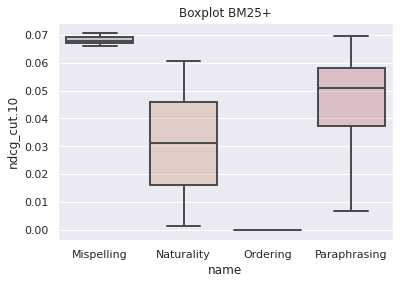

In [ ]:
#BM25
model_name = 'BM25+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/antique/variations_BM25_antique"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
scores_variation
df =return_boxplot(model_name,scores_variation[["name","ndcg_cut.10"]])

In [ ]:
df_BM25 = df.rename(columns={"ndcg_cut.10": "BM25"})
df_BM25

,name,BM25
1,Mispelling,0.070778
2,Mispelling,0.067728
3,Mispelling,0.066181
4,Naturality,0.001302
5,Naturality,0.060801
6,Ordering,-0.000230
7,Paraphrasing,0.069504
8,Paraphrasing,0.006728
9,Paraphrasing,0.054471
10,Paraphrasing,0.047296


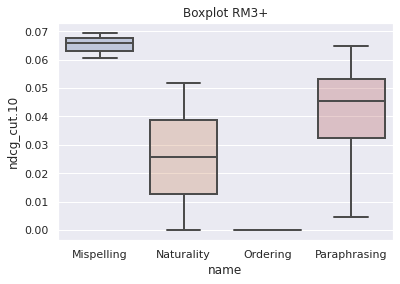

In [ ]:
#RM3
model_name = 'RM3+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/antique/variations_RM3_antique"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df = return_boxplot(model_name,scores_variation)

In [ ]:
scores_variation

,name,ndcg_cut.10,ndcg_cut.10 p-value
0,BERT,0.000000,NaN
1,BERT+QueriesFromWordSwapNeighboringCharacterSwap,0.097113,2.097266e-11
2,BERT+QueriesFromWordSwapQWERTY,0.091253,3.716093e-11
3,BERT+QueriesFromWordSwapRandomCharacterSubstit...,0.102270,6.157993e-14
4,BERT+QueriesFromnaturality_by_removing_stop_words,0.033451,3.690131e-07
5,BERT+QueriesFromsummarization_with_t5-base_fro...,0.121370,2.756083e-20
6,BERT+QueriesFromWordInnerSwapRandom,0.009350,2.665565e-02
7,BERT+QueriesFromback_translation_pivot_languag...,0.085543,4.092189e-10
8,BERT+QueriesFromramsrigouthamg/t5_paraphraser,0.020769,7.390143e-04
9,BERT+QueriesFromWordSwapEmbedding,0.078616,3.656861e-11


In [ ]:
df_RM3 = df.rename(columns={"ndcg_cut.10": "RM3"})
df_RM3

,name,RM3
1,Mispelling,0.069453
2,Mispelling,0.065764
3,Mispelling,0.060492
4,Naturality,-0.000092
5,Naturality,0.051779
6,Ordering,0.000000
7,Paraphrasing,0.064953
8,Paraphrasing,0.004750
9,Paraphrasing,0.049258
10,Paraphrasing,0.041422


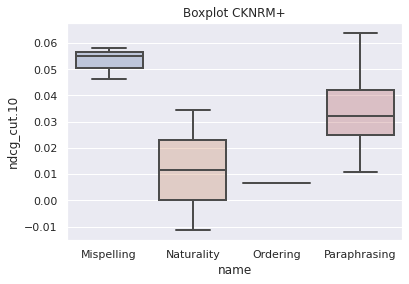

In [ ]:
#CKNRM
model_name = 'CKNRM+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/antique/variations_CKNRM_antique"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df = return_boxplot(model_name,scores_variation)

In [ ]:
df_CKNRM = df.rename(columns={"ndcg_cut.10": "CKNRM"})
df_CKNRM

,name,CKNRM
1,Mispelling,0.058286
2,Mispelling,0.046299
3,Mispelling,0.055004
4,Naturality,-0.011494
5,Naturality,0.034504
6,Ordering,0.006545
7,Paraphrasing,0.063940
8,Paraphrasing,0.010734
9,Paraphrasing,0.034910
10,Paraphrasing,0.029512


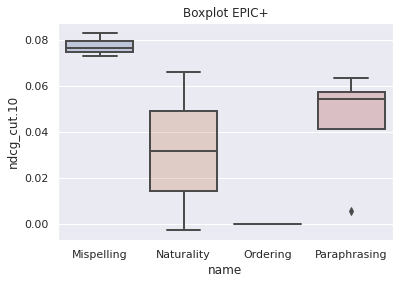

In [ ]:
#EPIC
model_name = 'EPIC+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/antique/variations_EPIC_antique"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df = return_boxplot(model_name,scores_variation)

In [ ]:
df_EPIC = df.rename(columns={"ndcg_cut.10": "EPIC"})
df_EPIC

,name,EPIC
1,Mispelling,0.083106
2,Mispelling,0.073016
3,Mispelling,0.076270
4,Naturality,-0.002962
5,Naturality,0.066160
6,Ordering,-0.000168
7,Paraphrasing,0.063336
8,Paraphrasing,0.005643
9,Paraphrasing,0.053002
10,Paraphrasing,0.055413


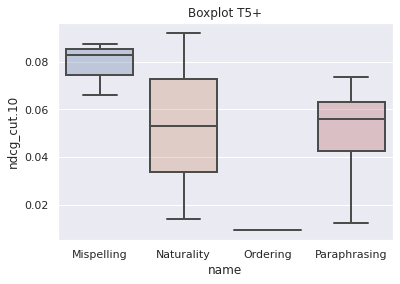

In [ ]:
#T5
model_name = 'T5+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/antique/variations_T5_antique"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df = return_boxplot(model_name,scores_variation)

In [ ]:
df_T5 = df.rename(columns={"ndcg_cut.10": "T5"})
df_T5

,name,T5
1,Mispelling,0.082659
2,Mispelling,0.066033
3,Mispelling,0.087485
4,Naturality,0.014106
5,Naturality,0.092035
6,Ordering,0.009344
7,Paraphrasing,0.073665
8,Paraphrasing,0.012512
9,Paraphrasing,0.052426
10,Paraphrasing,0.059261


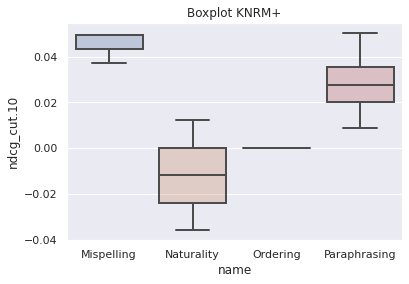

In [ ]:
#KNRM
model_name = 'KNRM+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/antique/variations_KNRM_antique"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df =return_boxplot(model_name,scores_variation)

In [ ]:
df_KNRM = df.rename(columns={"ndcg_cut.10": "KNRM"})
df_KNRM

,name,KNRM
1,Mispelling,0.049203
2,Mispelling,0.037297
3,Mispelling,0.049498
4,Naturality,-0.035981
5,Naturality,0.012210
6,Ordering,-0.000110
7,Paraphrasing,0.050383
8,Paraphrasing,0.008692
9,Paraphrasing,0.030667
10,Paraphrasing,0.024170


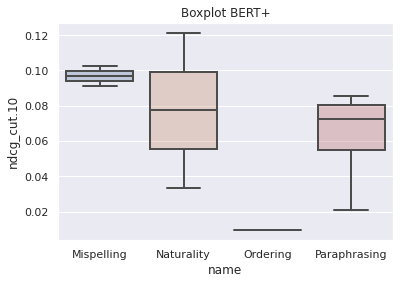

In [ ]:
#BERT
model_name = 'BERT+'

path = "/gdrive/MyDrive/SORBONNE/S2/rital/RI/projet/pickle/antique/variations_BERT_antique"
scores_variation = open_pickle(path)
scores_variation =scores_variation[["name","ndcg_cut.10","ndcg_cut.10 p-value"]]
scores_variation.round(6)
df =return_boxplot(model_name,scores_variation)

In [ ]:
df_BERT = df.rename(columns={"ndcg_cut.10": "BERT"})
df_BERT

,name,BERT
1,Mispelling,0.097113
2,Mispelling,0.091253
3,Mispelling,0.102270
4,Naturality,0.033451
5,Naturality,0.121370
6,Ordering,0.009350
7,Paraphrasing,0.085543
8,Paraphrasing,0.020769
9,Paraphrasing,0.078616
10,Paraphrasing,0.066291


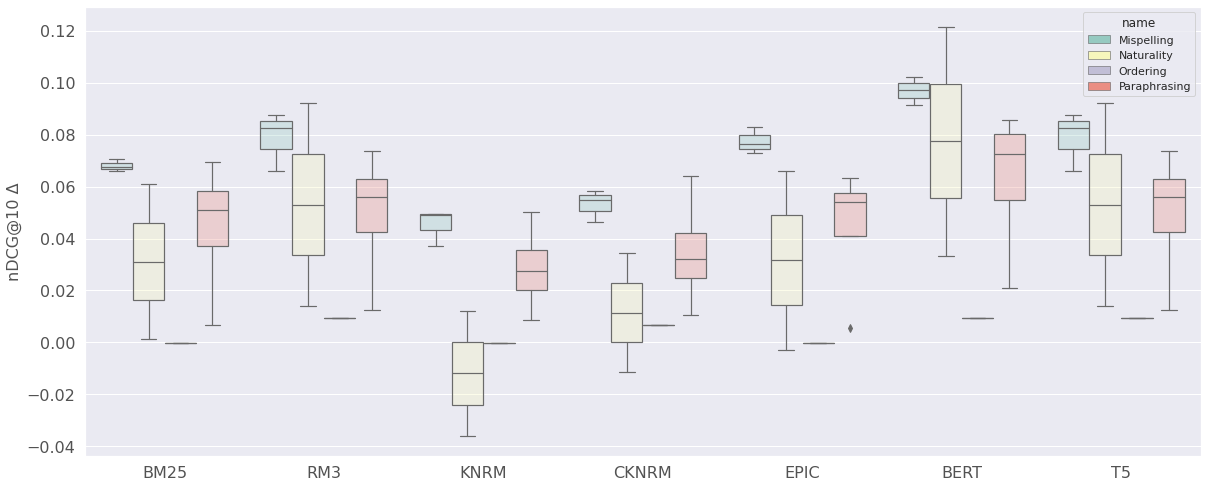

In [ ]:


df_merge  =(pd.merge(df_BM25, df_RM3, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)

df_merge = (pd.merge(df_merge, df_KNRM, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)

df_merge = (pd.merge(df_merge, df_CKNRM, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)

df_merge = (pd.merge(df_merge, df_EPIC, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)


df_merge = (pd.merge(df_merge, df_BERT, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)



df_merge = (pd.merge(df_merge, df_T5, left_index=True, right_index=True)).drop(['name_y'],axis=1)
df_merge = df_merge.rename({'nae_x': 'name'})
df_merge['name'] = df_merge['name_x']
df_merge = df_merge.drop(['name_x'],axis=1)


sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.boxplot(x='variable',y='value',hue='name', 
                 data=df_merge.melt(id_vars=['name']),palette='Set3', 
                 linewidth=1.2)    
# adding transparency to colors
for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .3))

            
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}

ax.set_ylabel('nDCG@10 Δ', fontsize=16, color=font_color, **hfont)
ax.set_xlabel('', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)


plt.show()

In [ ]:
df_mispelling = df_merge[df_merge['name']=='Mispelling']
df_naturality = df_merge[df_merge['name']=='Naturality']
df_ordering = df_merge[df_merge['name']=='Ordering']
df_paraphrasing = df_merge[df_merge['name']=='Paraphrasing']


In [ ]:
df_mispelling.corr(method ='pearson')


,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
BM25,1.000000,-0.029563,0.164645,0.439119,0.790885,-0.295817,-0.029563
RM3,-0.029563,1.000000,0.981054,0.885054,0.588316,0.963573,1.000000
KNRM,0.164645,0.981054,1.000000,0.958467,0.733829,0.893504,0.981054
CKNRM,0.439119,0.885054,0.958467,1.000000,0.897100,0.728321,0.885054
EPIC,0.790885,0.588316,0.733829,0.897100,1.000000,0.350620,0.588316
BERT,-0.295817,0.963573,0.893504,0.728321,0.350620,1.000000,0.963573
T5,-0.029563,1.000000,0.981054,0.885054,0.588316,0.963573,1.000000


In [ ]:
df_naturality.corr(method ='pearson')

,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
BM25,1.0,1.0,1.0,1.0,1.0,1.0,1.0
RM3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KNRM,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CKNRM,1.0,1.0,1.0,1.0,1.0,1.0,1.0
EPIC,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BERT,1.0,1.0,1.0,1.0,1.0,1.0,1.0
T5,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df_paraphrasing.corr(method ='pearson')

,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
BM25,1.000000,0.976702,0.938831,0.915814,0.974865,0.991052,0.976702
RM3,0.976702,1.000000,0.903641,0.891764,0.984372,0.954825,1.000000
KNRM,0.938831,0.903641,1.000000,0.996551,0.850156,0.894049,0.903641
CKNRM,0.915814,0.891764,0.996551,1.000000,0.824822,0.860781,0.891764
EPIC,0.974865,0.984372,0.850156,0.824822,1.000000,0.976476,0.984372
BERT,0.991052,0.954825,0.894049,0.860781,0.976476,1.000000,0.954825
T5,0.976702,1.000000,0.903641,0.891764,0.984372,0.954825,1.000000
